In [72]:
import pandas as pd

dataframe = pd.read_csv('CVD_cleaned.csv')
dataframe.head

<bound method NDFrame.head of        General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1

In [73]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [74]:
df = dataframe.copy()

## Parse categorical variables.
Go through each column, and assign each category a different variable based on the possible range of variables.
- General Health can be poor, fair, good, very good, or excellent.
- Checkup can be within past year, within past 2 years, within past 5 years, or 5 or more years ago.
- Exercise through Depression are binary values. Yes = 1, No = 0. Same for Arthritis and Smoking_History.
- Diabetes is Yes, No, or Borderline. Perhaps 1, 0, and 0.5 respectively.
- Sex is binary in this dataset. Male = 1, Female = 0.
- Age Category must be parsed clearly. Not sure of the possible values at a glance.

The following cell is mostly for the programmer to be clearly aware of the categorical variables. It is useful in the actual mapping for the cell afterwards.

In [75]:
import numpy as np

cols = np.array([col for col in df])
categories = {category: np.unique(df[category].values).tolist() for category in cols if not isinstance(df[category][0],float)}
categories

{'General_Health': ['Excellent', 'Fair', 'Good', 'Poor', 'Very Good'],
 'Checkup': ['5 or more years ago',
  'Never',
  'Within the past 2 years',
  'Within the past 5 years',
  'Within the past year'],
 'Exercise': ['No', 'Yes'],
 'Heart_Disease': ['No', 'Yes'],
 'Skin_Cancer': ['No', 'Yes'],
 'Other_Cancer': ['No', 'Yes'],
 'Depression': ['No', 'Yes'],
 'Diabetes': ['No',
  'No, pre-diabetes or borderline diabetes',
  'Yes',
  'Yes, but female told only during pregnancy'],
 'Arthritis': ['No', 'Yes'],
 'Sex': ['Female', 'Male'],
 'Age_Category': ['18-24',
  '25-29',
  '30-34',
  '35-39',
  '40-44',
  '45-49',
  '50-54',
  '55-59',
  '60-64',
  '65-69',
  '70-74',
  '75-79',
  '80+'],
 'Smoking_History': ['No', 'Yes']}

It's time to actually process the categorical data into numerical values.
The following code block does separate mappings and lambda functions for the various columns. This could have all been done in one single mapping and one lambda function, but I did it this way to make it more clear to the reader how certain columns are being mapped.

In [103]:
# General Health, 1-5
mapping = {'Poor':1, 'Fair':2, 'Good':3, 'Very Good':4, 'Excellent':5}
df['General_Health'] = df['General_Health'].map(lambda x: mapping.get(x,x))

# Checkup history, 1-5
mapping = {'Never':1,'5 or more years ago':2,'Within the past 5 years':3,
           'Within the past 2 years':4,'Within the past year':5}
df['Checkup'] = df['Checkup'].map(lambda x: mapping.get(x,x))

# Various booleans, 0 or 1
mapping = {'No':0,'Yes':1,'No, pre-diabetes or borderline diabetes':2,'Yes, but female told only during pregnancy':3}
bools = ['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Smoking_History']
for buul in bools:
    df[buul] = df[buul].map(lambda x: mapping.get(x,x))

# Binary sex, 1 or 2
mapping = {'Female':1,'Male':2}
df['Sex'] = df['Sex'].map(lambda x: mapping.get(x,x))

# Age category, 0-12
mapping = {age:categories['Age_Category'].index(age) for age in categories['Age_Category']}
df['Age_Category'] = df['Age_Category'].map(lambda x: mapping.get(x,x))
    
df.head

<bound method NDFrame.head of         General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0                    1        4         0              0            0   
1                    4        5         0              1            0   
2                    4        5         1              0            0   
3                    1        5         1              1            0   
4                    3        5         0              0            0   
...                ...      ...       ...            ...          ...   
308849               4        5         1              0            0   
308850               2        3         1              0            0   
308851               4        2         1              0            0   
308852               4        5         1              0            0   
308853               5        5         1              0            0   

        Other_Cancer  Depression  Diabetes  Arthritis  Sex  Age_Category  \
0                

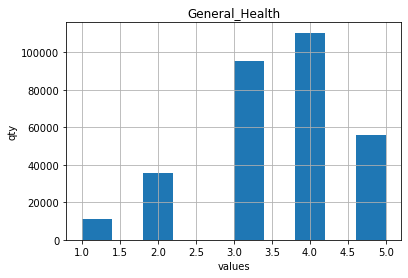

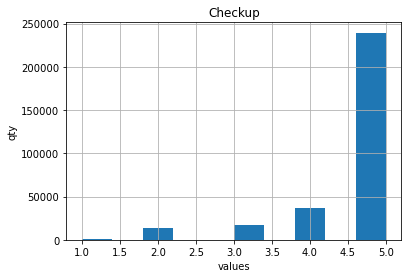

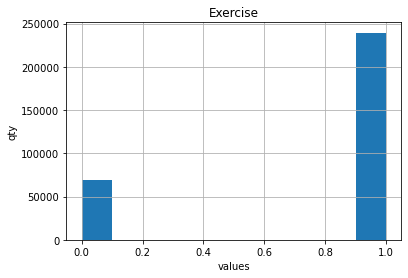

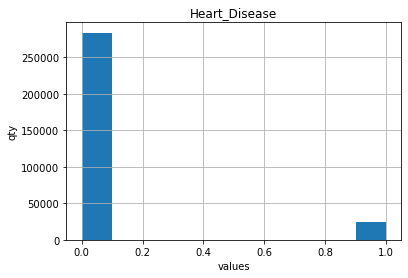

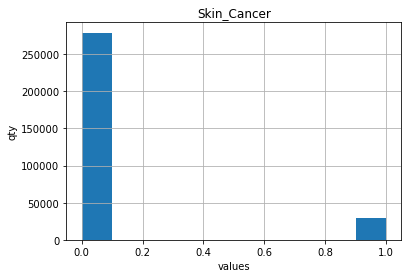

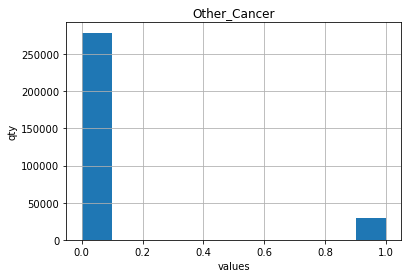

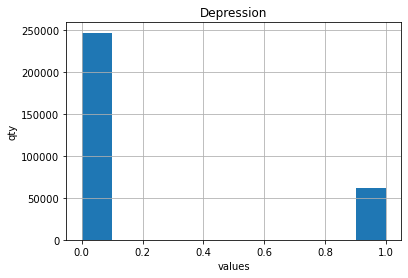

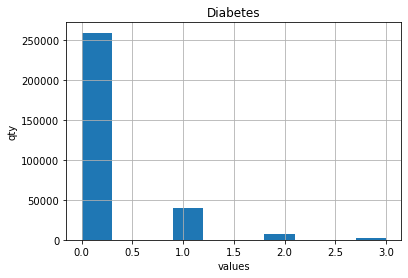

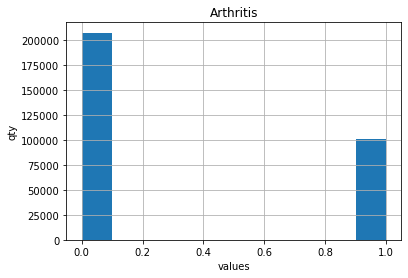

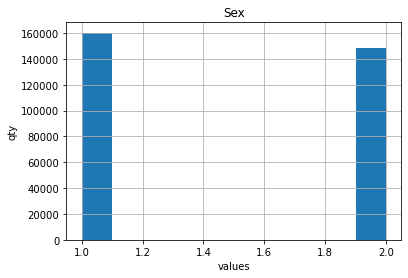

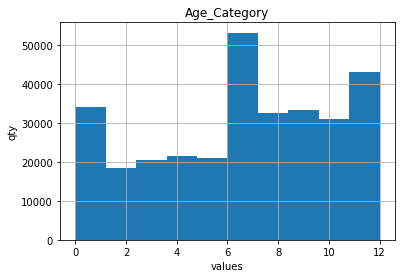

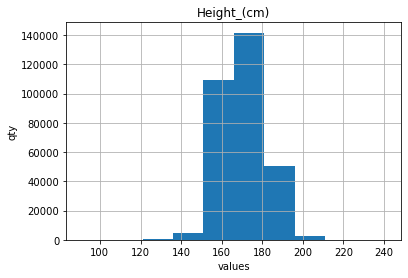

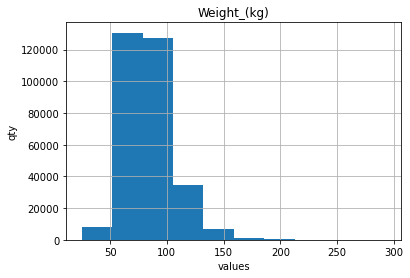

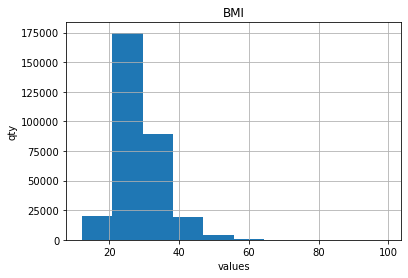

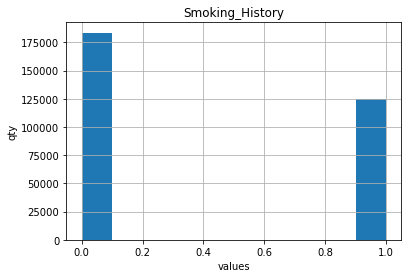

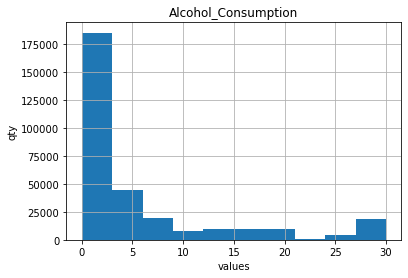

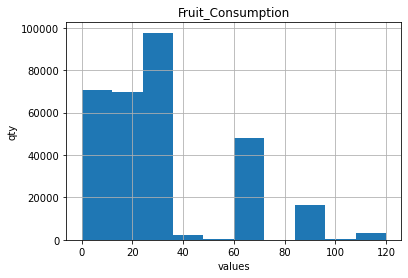

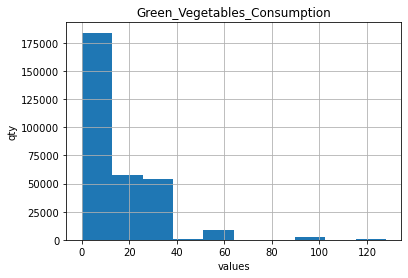

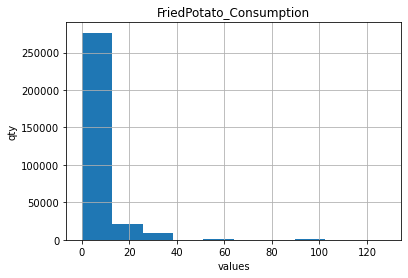

In [125]:
import matplotlib.pyplot as plt

for col in df.columns:
    df.hist(column=col)

    # fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 12))
    # fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.xlabel('values')
    plt.ylabel('qty')
    plt.show()

### Standardize/Normalize data as necessary.

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

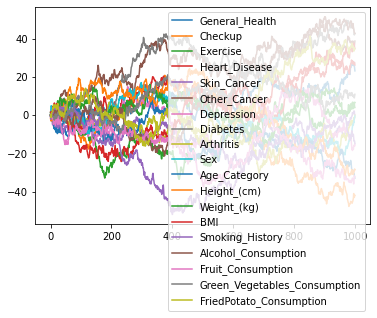

In [131]:
# This graph means nothing lol I just wanted to see what would happen

plt.close('all')
ts = pd.Series(np.random.randn(1000))
ts=ts.cumsum()

visualizer = pd.DataFrame(np.random.randn(1000,19),index=ts.index,columns=df.columns)
visualizer = visualizer.cumsum()
plt.figure()
visualizer.plot()